Image directory: /Users/estepark/Documents/week3_wedns/White
/Users/estepark/Documents/week3_wedns/White/EUSR6C101V5V000B2AT -2.02_20200613_203403_White_Reg.Png
150468.0
150836.0
150987.0
150973.0
150904.0
150816.0
150784.0
150850.0
150975.0
151079.0
151160.0
151239.0
151347.0
151464.0
151666.0
151870.0
152071.0
152247.0
152429.0
152574.0
152679.0
152829.0
152916.0
152971.0
153007.0
153039.0
153031.0
153004.0
152984.0
152943.0
152951.0
152967.0
152932.0
152872.0
152872.0
152847.0
152874.0
152860.0
152904.0
152887.0
152877.0
152815.0
152818.0
152798.0
152801.0
152773.0
152787.0
152763.0
152771.0
152718.0
152725.0
152742.0
152711.0
152716.0
152673.0
152631.0
152625.0
152632.0
152613.0
152594.0
152614.0
152611.0
152581.0
152553.0
152517.0
152496.0
152477.0
152442.0
152426.0
152415.0
152403.0
152382.0
152340.0
152364.0
152326.0
152321.0
152324.0
152328.0
152338.0
152324.0
152332.0
152277.0
152279.0
152319.0
152312.0
152274.0
152310.0
152328.0
152315.0
152296.0
152316.0
152314.0
152329.0
15

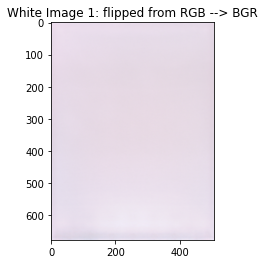

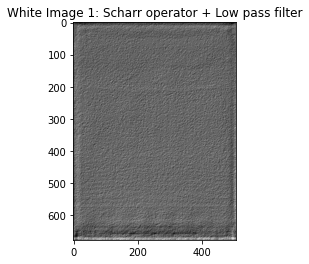

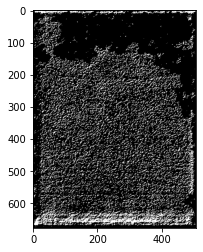

In [267]:
import numpy as np
import cv2 as cv
import os, sys, glob, scipy
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack, fft
from scipy.fftpack import fftshift, irfft, rfft 
from scipy.signal import blackman
"""
author: ester park mf
count = 1
#pathTest = '/Users/estepark/Documents/week1_thurs/GRR_Sample/Vermouth_EVT/20181126/Images/Reg/White/*.Png'
pathTest = '/Users/estepark/Documents/week1_thurs/GRR_Sample/Vermouth_EVT/20181126/Images/Reg/White'
isdir = os.path.isdir(pathTest) 
"""
class CrossHatch(object):
    def __init__(self, path , rows, col):
        assert os.path.isdir(pathTest), "gey"
        self.path = path
        self.rows = rows
        self.col = col
    def createDict(self):
        # define scharr kernal to convolve along diagonals
        kern = [[0, 1,  0], [1, 0, -1],[ 0, -1 ,0]]
        # define counter to number how many images in the dir
        count = 1
        White = {}
        img = [] # 1st value in dictionary
        imgScharr = [] # 2nd value in dictionary
        score = [] # will be used as numerical value > 0 that quantifies how many cols are crosshatched
        imgScharr1 = []
        imgBoundingBox = []
        print("Image directory: " + str(self.path))
        #print("Number of rows: " + str(self.rows))
        #print("Number of col: " + str(self.col))
        for fname in glob.glob(self.path+'/*.Png'):
            print(fname)
            img.append(cv.imread(fname)) #first value pair
            plt.figure()
            plt.title('White Image ' + str(count) + ": flipped from RGB --> BGR")
            plt.imshow(img[-1])
            #==============================================================
            # 1st VALUE, original pixel BGR mat 
            #==============================================================
            im = img.copy()
            imgray = cv.cvtColor(im[-1], cv.COLOR_BGR2GRAY)
            #====================================================================================================
            # 3rd VALUE, 4 subplots: 1st) spatial domain BGR, 2) plot np.fft.fft, 3) stem fftpack.fftfreq
            #====================================================================================================
            samplingFreq = 100
            samplingInterval = 1 / samplingFreq
            beginTime = 0
            endTime = self.col
            teim = np.arange(beginTime,endTime, 1)
            countPeaks = [] # max valu = 646, counts how many stem peaks there are per column
            
            for i in range(self.col):
                #figure , axis = plt.subplots(3,1)
                freqRowSamps = np.linspace(0,self.rows-1, self.rows)

                # the issue is x-axis png ranges from 481, y-axis ranges 646, but these values change slightly based on image
                amplitude = imgray[:,i] # ampltiude == # of rows
                
                #print("--------------------------------------------------------")
                #plt.subplots_adjust ( hspace = 3)
                #time domain representation for CrossHatch periodic signal
                #axis[0].set_title('White Image #%s' % (count) +', Col #%s' % (i) + " Spatial Intensity vs. Pixel distance" )
                #axis[0].set_xlabel('Pixel Distance along y-axis ')
                #axis[0].set_ylabel('Pixel intensity')
                #axis[0].plot(amplitude)
                
                """
                # https://pythontic.com/visualization/signals/fouriertransform_fft
                plt.subplots_adjust ( hspace = 3)
                # frequency domain representation
                fourierTransf = np.fft.fft(amplitude)/ len(amplitude) # normalize amplitude
                fourierTransf = fourierTransf[range(int
                (len(amplitude)/2))] #exclude sampling freq??
                tpCount = len(amplitude)
                val = np.arange(int(tpCount/2))
                timePer = tpCount/samplingFreq
                freq = val/timePer 
                axis[1].set_title('White Image # %s' % (count) +', Col # %s' % (i) + " FFT Intensity vs. Pixel distance fft.fft plot " )
                axis[1].set_xlabel('Frequency along y-axis pixel locations')
                axis[1].set_ylabel('Amplitude')
                axis[1].plot(freq, abs(fourierTransf))
                # https://docs.scipy.org/doc/scipy-0.14.0/reference/tutorial/fftpack.html
                # Windowing the signal with a dedicated window function helps mitigate spectral leakage.
                # a Blackman window from scipy.signal and shows the effect of windowing
                # try irfft, rfft, fftshift?
                plt.subplots_adjust ( hspace = 3)
                yf = fft(amplitude)
                w = blackman(self.rows)
                ywf = irfft(w*yf)
                axis[3].set_title('White Image # %s' % (count) +', Col # %s' % (i) + " FFT Intensity vs. Pixel distance fft.fft semilogy" )
                axis[3].set_xlabel('Frequency along y-axis pixel locations')
                axis[3].set_ylabel('Amplitude')
                #axis[3].set_xlim(-samplingFreq / 2, samplingFreq / 2)
                #axis[3].set_ylim(-2, 100000)
                axis[3].semilogy(frequen, np.abs(ywf))
                print("--------------------------------------------------------")
                """
                
                # https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
                #plt.subplots_adjust ( hspace = 3)
                X = fftpack.fft(amplitude)
                amplitude1 = fftpack.fftfreq(len(amplitude))*samplingFreq
                #axis[1].set_title('Image #%s' % (count) +', Col #%s' % (i) + " FFT Intensity vs. Pixel distance (fftpack.fftfreq) stem " )
                #axis[1].set_xlabel('Frequency along y-axis pixel locations')
                #axis[1].set_ylabel('Amplitude')
                #axis[1].set_xlim(-5, samplingFreq / 1.2)
                #axis[1].set_ylim(-2, 600)
                print(max(np.abs(X))) 
                #axis[1].stem(freqRowSamps, np.abs(X), use_line_collection = True) 
                
        
                #plt.subplots_adjust ( hspace = 3)     
                # https://pythonawesome.com/overview-of-the-peaks-dectection-algorithms-available-in-python/
                freqPeaks = scipy.signal.find_peaks( np.abs(X) , height=[200, 500] )
                indexPeaks = freqPeaks[0]
                heightPeaks = np.array(list(freqPeaks[1].values()) , dtype = object)
                heightPeaks = heightPeaks[0]
                #print('height peaks: ' + str(heightPeaks))
                #print('index peaks: ' + str(indexPeaks))
                #axis[2].set_title('Image #%s' % (count) +', Col #%s' % (i) + " Peaks")
                #axis[2].set_ylabel('Amplitude')
                #axis[2].set_xlabel('Frequency along y-axis pixel locations')
                #axis[2].set_xlim(-5, samplingFreq / 1.2)
                #axis[2].set_ylim(-2, 600)
                if heightPeaks.size > 0:
                    #axis[2].stem(indexPeaks,heightPeaks, use_line_collection=True)
                    countPeaks.append(heightPeaks.size)
                else:
                    pass

            #print(imgray)
            
            print('length crosshatch is ' + str(len(countPeaks)))
            isCrossHatch = sum(countPeaks)
            score.append(isCrossHatch)
            #==============================================================
            # 2nd VALUE, Scharr pixel mat w/ bounding box
            #==============================================================
            #imgray = cv.bilateralFilter(imgray, 15, 75, 75)
            imgray = cv.bilateralFilter(imgray, 1, 500, 500)
            diag_img = signal.convolve2d(imgray, np.array(kern), boundary='symm', mode='same')
            print(diag_img[0][0])
            print(np.array(diag_img).shape)
            print(type(diag_img))
            ret, thresh = cv.threshold(np.array(diag_img,dtype='uint8'), 10, 255, cv.THRESH_BINARY)
            contours, hierarchy = cv.findContours(np.array(diag_img,dtype='uint8'), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
      
            
            im_with_contours = cv.drawContours(np.array(diag_img,dtype='uint8'), contours, -1, (0,255,0), 2)
            imgScharr.append(diag_img) #2nd value pair
            imgBoundingBox.append(im_with_contours)
            plt.figure()
            plt.title('White Image ' + str(count) + ": Scharr operator + Low pass filter")
            plt.imshow(diag_img , cmap="gray")
            plt.show()
            
        
            plt.imshow(im_with_contours, cmap="gray")
            imgScharr1.append(im_with_contours)

            White.update({'White %s' % (count): (img[count-1], imgScharr[count-1], imgScharr1[count-1], score[count-1])  } )

            count = count +1
            if count == 11:
                print("mean cross hatch score: " + str(np.mean(score)))


#path = 'C:/Users/ester/3D Objects/week8tues/week8tues/*.csv'
#path = 'C:/Users/epark2/3D Objects/0519/week8tues/*.csv'
#pathTest = '/Users/estepark/Documents/week1_thurs/GRR_Sample/Vermouth_EVT/20181126/Images/Reg/White'
pathTest = '/Users/estepark/Documents/week3_wedns/White'
isdir = os.path.isdir(pathTest) 

stuff = CrossHatch(path = pathTest, rows=  678, col= 480)
stuff.createDict()

In [268]:
stuff